In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

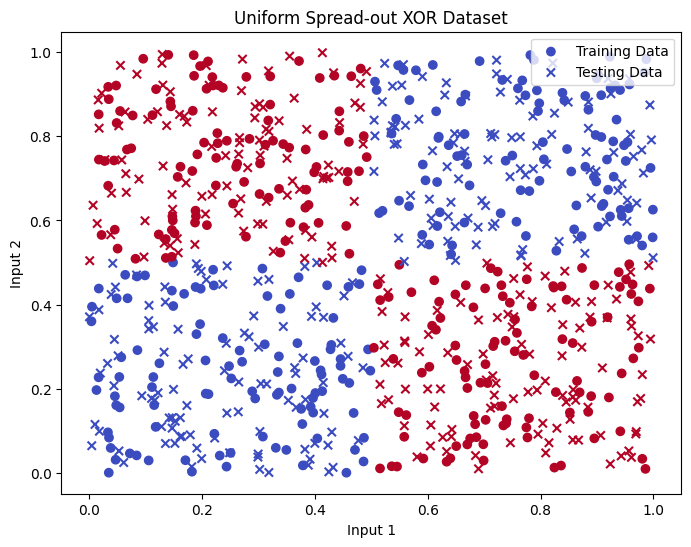

In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate spread-out XOR dataset with uniform points within corners
def generate_uniform_spread_xor_data(num_samples_per_class):
    # Class 0 points: spread out in the (0,0) and (1,1) corners
    X_class0_corner1 = torch.rand(num_samples_per_class, 2) * 0.5
    X_class0_corner2 = torch.rand(num_samples_per_class, 2) * 0.5 + 0.5
    # Class 1 points: spread out in the (1,0) and (0,1) corners
    X_class1_corner1 = torch.rand(num_samples_per_class, 2) * torch.tensor([0.5, 0.5]) + torch.tensor([0.5, 0])
    X_class1_corner2 = torch.rand(num_samples_per_class, 2) * torch.tensor([0.5, 0.5]) + torch.tensor([0, 0.5])

    # Combine inputs and labels
    X = torch.cat([X_class0_corner1, X_class0_corner2, X_class1_corner1, X_class1_corner2], dim=0)
    y = torch.cat([torch.zeros(num_samples_per_class*2), torch.ones(num_samples_per_class*2)]).unsqueeze(1)

    return X, y

# Generate uniform spread-out XOR dataset
X_train_uniform, y_train_uniform = generate_uniform_spread_xor_data(100)
X_test_uniform, y_test_uniform = generate_uniform_spread_xor_data(100)

# Plot uniform spread-out XOR dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_uniform[:, 0], X_train_uniform[:, 1], c=y_train_uniform.flatten(), cmap='coolwarm', label='Training Data')
plt.scatter(X_test_uniform[:, 0], X_test_uniform[:, 1], c=y_test_uniform.flatten(), cmap='coolwarm', marker='x', label='Testing Data')
plt.title('Uniform Spread-out XOR Dataset')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()



The above plot shows the XOR dataset with 200 testing and training points

We are making a simple NN with two inputs, 2 hidden layers with three nodes and one nodes respectively the output layer with a single node, with tanh activation


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_uniform, y_train_uniform)
test_dataset = TensorDataset(X_test_uniform, y_test_uniform)

train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

# Initialize the model, loss function, and optimizer
model = XORModel()
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss / len(train_loader)}")

        # Evaluation on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss / len(test_loader)}")

# No need to evaluate accuracy during training



Epoch 100/1000, Train Loss: 0.6910537523882729
Epoch 100/1000, Test Loss: 0.6909938369478498
Epoch 200/1000, Train Loss: 0.561028242111206
Epoch 200/1000, Test Loss: 0.5558366349765232
Epoch 300/1000, Train Loss: 0.4816006634916578
Epoch 300/1000, Test Loss: 0.4703087827989033
Epoch 400/1000, Train Loss: 0.4461777018649237
Epoch 400/1000, Test Loss: 0.4472312054463795
Epoch 500/1000, Train Loss: 0.4179487036807196
Epoch 500/1000, Test Loss: 0.41717676392623354
Epoch 600/1000, Train Loss: 0.3985209252153124
Epoch 600/1000, Test Loss: 0.3961069371019091
Epoch 700/1000, Train Loss: 0.391372344323567
Epoch 700/1000, Test Loss: 0.38524421623774935
Epoch 800/1000, Train Loss: 0.3915061056613922
Epoch 800/1000, Test Loss: 0.3826578621353422
Epoch 900/1000, Train Loss: 0.38263035246304106
Epoch 900/1000, Test Loss: 0.378347390464374
Epoch 1000/1000, Train Loss: 0.3855333370821817
Epoch 1000/1000, Test Loss: 0.37661469408444


<ipython-input-4-db1b95cf174a>:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap=plt.cm.coolwarm, marker='x', s=20, edgecolors='k', label='Testing Data')


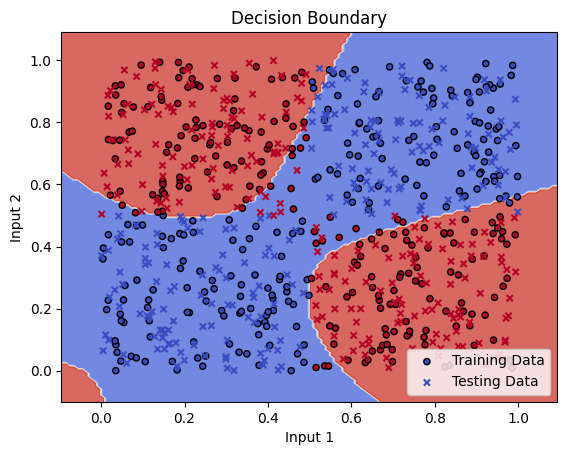

In [ ]:
import numpy as np

def plot_decision_boundary(model, X_train, y_train, X_test, y_test):
    # Set min and max values and give it some padding
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    inputs = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    outputs = model(inputs)
    Z = torch.round(torch.sigmoid(outputs)).reshape(xx.shape).detach().numpy()

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap=plt.cm.coolwarm, marker='x', s=20, edgecolors='k', label='Testing Data')
    plt.title('Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.show()

# Plot decision boundary
model.eval()
plot_decision_boundary(model, X_train_uniform, y_train_uniform, X_test_uniform, y_test_uniform)


Here the final training and testing losses are 0.3855333370821817 and 0.37661469408444 respectively after 1000 epochs. Using the tanh activation, the model has captured the pattern of the training data.

Now we apply L1 regularization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network with L1 regularization
class XORModel(nn.Module):
    def __init__(self, lambda_l1):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        self.tanh = nn.Tanh()
        self.lambda_l1 = lambda_l1

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x

    def l1_regularization(self):
        l1_loss = 0
        for param in self.parameters():
            l1_loss += torch.norm(param, 1)
        return self.lambda_l1 * l1_loss

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_uniform, y_train_uniform)
test_dataset = TensorDataset(X_test_uniform, y_test_uniform)

train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

# Initialize the model, loss function, and optimizer
lambda_l1 = 0.001  # Initial regularization parameter
model = XORModel(lambda_l1)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the model with L1 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels) + model.l1_regularization()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss / len(train_loader)}")

        # Evaluation on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss / len(test_loader)}")

# No need to evaluate accuracy during training


Epoch 100/1000, Train Loss: 0.6804644422871726
Epoch 100/1000, Test Loss: 0.6691970186574119
Epoch 200/1000, Train Loss: 0.6367926256997245
Epoch 200/1000, Test Loss: 0.6100792714527675
Epoch 300/1000, Train Loss: 0.6068616850035531
Epoch 300/1000, Test Loss: 0.5808955218110766
Epoch 400/1000, Train Loss: 0.5972162868295398
Epoch 400/1000, Test Loss: 0.5688669340951102
Epoch 500/1000, Train Loss: 0.5922479672091348
Epoch 500/1000, Test Loss: 0.5601597556046077
Epoch 600/1000, Train Loss: 0.5503047321523938
Epoch 600/1000, Test Loss: 0.520285101873534
Epoch 700/1000, Train Loss: 0.4429472493273871
Epoch 700/1000, Test Loss: 0.4033542977912085
Epoch 800/1000, Train Loss: 0.4316781163215637
Epoch 800/1000, Test Loss: 0.39190048830849783
Epoch 900/1000, Train Loss: 0.4313373310225351
Epoch 900/1000, Test Loss: 0.38558032895837513
Epoch 1000/1000, Train Loss: 0.4276429201875414
Epoch 1000/1000, Test Loss: 0.3816757755620139


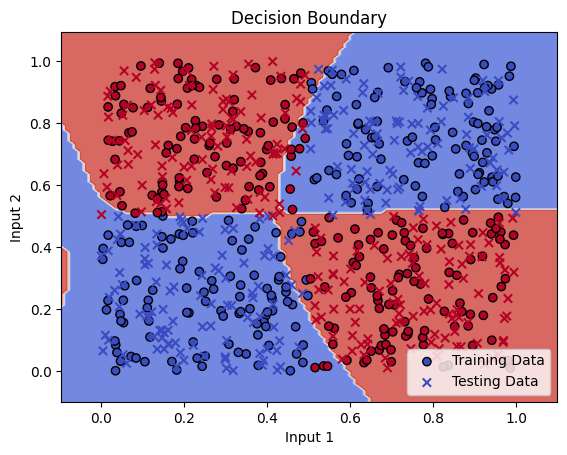

In [ ]:
def plot_decision_boundary(model, X_train, y_train, X_test, y_test):
    # Define meshgrid of points
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the meshgrid
    with torch.no_grad():
        inputs = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
        outputs = model(inputs)
        predictions = torch.round(torch.sigmoid(outputs)).numpy().reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, predictions, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap=plt.cm.coolwarm, edgecolors='k', label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap=plt.cm.coolwarm, marker='x', label='Testing Data')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

# Plot decision boundary with both training and testing data points
plot_decision_boundary(model, X_train_uniform, y_train_uniform, X_test_uniform, y_test_uniform)


Here, the training and testing loss after 1000 epochs are 0.4276429201875414 and 0.3816757755620139 respectively. After applying L1 regularisation, it is observed that the training loss has increased a bit suggesting that the model is slightly less overfit as expected from regularization. The tesing losses with and without regularization is almost similar.

For L2 regularization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network with L2 regularization
class XORModel(nn.Module):
    def __init__(self, lambda_l2):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        self.tanh = nn.Tanh()
        self.lambda_l2 = lambda_l2

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x

    def l2_regularization(self):
        l2_loss = 0
        for param in self.parameters():
            l2_loss += torch.norm(param, 2)**2
        return self.lambda_l2 * l2_loss

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_uniform, y_train_uniform)
test_dataset = TensorDataset(X_test_uniform, y_test_uniform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
lambda_l2 = 0.001  # Regularization parameter
model = XORModel(lambda_l2)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the model with L2 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels) + model.l2_regularization()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss / len(train_loader)}")

        # Evaluation on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss / len(test_loader)}")

# No need to evaluate accuracy during training


Epoch 100/1000, Train Loss: 0.6927245534383334
Epoch 100/1000, Test Loss: 0.6925146808991065
Epoch 200/1000, Train Loss: 0.6895031562218299
Epoch 200/1000, Test Loss: 0.6872501831788284
Epoch 300/1000, Train Loss: 0.6657348091785724
Epoch 300/1000, Test Loss: 0.6529325590683863
Epoch 400/1000, Train Loss: 0.5717087708986722
Epoch 400/1000, Test Loss: 0.5304561096888322
Epoch 500/1000, Train Loss: 0.515518442942546
Epoch 500/1000, Test Loss: 0.44415727716225845
Epoch 600/1000, Train Loss: 0.5075649435703571
Epoch 600/1000, Test Loss: 0.42863572331575245
Epoch 700/1000, Train Loss: 0.5048114153055044
Epoch 700/1000, Test Loss: 0.42682992495023286
Epoch 800/1000, Train Loss: 0.5062836202291342
Epoch 800/1000, Test Loss: 0.42552440670820385
Epoch 900/1000, Train Loss: 0.5072368818979996
Epoch 900/1000, Test Loss: 0.42061803203362685
Epoch 1000/1000, Train Loss: 0.5060515908094553
Epoch 1000/1000, Test Loss: 0.42077362537384033


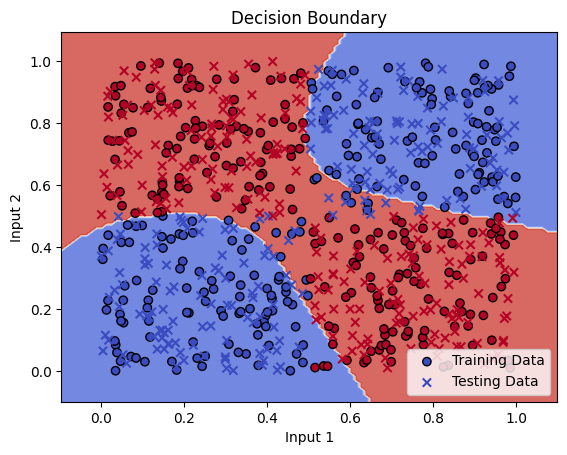

In [ ]:
# Plot decision boundary with both training and testing data points
plot_decision_boundary(model, X_train_uniform, y_train_uniform, X_test_uniform, y_test_uniform)


In the case of L2 regularization, the final training and testing losses are 0.5060515908094553 and 0.42077362537384033 after 1000 epochs. Here model is even less overfit on the training data after applying regularization

Now for Logistic Regression, addition of x1x2 parameter will be the best to capture the XOR dataset since it is of hyperbolic shape and hence the fit will be very accurate. Logistic Regression will be implemented as a MLP with just input layer and output layer. Output layer will have sigmoid activation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network for logistic regression
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(3, 1)  # Input has three features: x1, x2, and x1*x2
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Concatenate the original input features with the additional feature x1*x2
X_train_with_features = torch.cat([X_train_uniform, (X_train_uniform[:, 0] * X_train_uniform[:, 1]).unsqueeze(1)], dim=1)
X_test_with_features = torch.cat([X_test_uniform, (X_test_uniform[:, 0] * X_test_uniform[:, 1]).unsqueeze(1)], dim=1)

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_with_features, y_train_uniform)
test_dataset = TensorDataset(X_test_with_features, y_test_uniform)

train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the logistic regression model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss / len(train_loader)}")

        # Evaluation on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss / len(test_loader)}")






Epoch 100/1000, Train Loss: 0.6254923301083701
Epoch 100/1000, Test Loss: 0.6243701236588615
Epoch 200/1000, Train Loss: 0.5672087115900857
Epoch 200/1000, Test Loss: 0.5655895130974906
Epoch 300/1000, Train Loss: 0.5218050905636379
Epoch 300/1000, Test Loss: 0.5206565133162907
Epoch 400/1000, Train Loss: 0.4868639260530472
Epoch 400/1000, Test Loss: 0.4859777348382132
Epoch 500/1000, Train Loss: 0.45401098898478914
Epoch 500/1000, Test Loss: 0.45782176298754557
Epoch 600/1000, Train Loss: 0.4442371811185564
Epoch 600/1000, Test Loss: 0.4351614075047629
Epoch 700/1000, Train Loss: 0.4224888320480074
Epoch 700/1000, Test Loss: 0.41579498989241465
Epoch 800/1000, Train Loss: 0.4056563377380371
Epoch 800/1000, Test Loss: 0.3994823970964977
Epoch 900/1000, Train Loss: 0.3923178400312151
Epoch 900/1000, Test Loss: 0.385408063020025
Epoch 1000/1000, Train Loss: 0.3768003625529153
Epoch 1000/1000, Test Loss: 0.37303247834954945


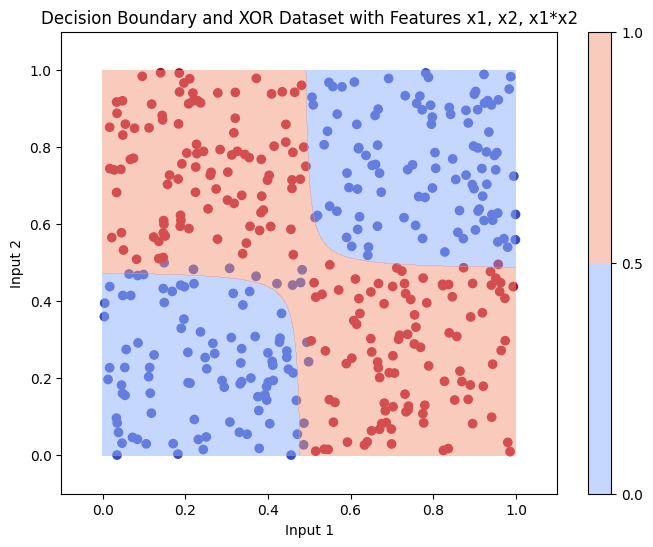

In [ ]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()]
    Z = model(torch.tensor(X_grid, dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0.0, 0.5, 1.0], cmap=plt.cm.coolwarm, alpha=0.5)
    plt.colorbar()
    plt.title('Decision Boundary and XOR Dataset with Features x1, x2, x1*x2')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.show()

plot_decision_boundary(model, X_train_uniform, y_train_uniform)

In the case of logistic regression, the final training and test losses are 0.3768003625529153 and 0.37303247834954945 respectively. The model performs better than L2 regularized MLP in testing, and performs equally good as the first two models with the addition of x1x2 feature that captures the shape of the XOR dataset

With the additional feautre x1^2, we conduct logistic regression, this is not expected to perform well as a parabolic decision boundary is not expected to capture the XOR pattern well

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the neural network for logistic regression
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(3, 1)  # Input has three features: x1, x2, and x1*x2
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Concatenate the original input features with the additional feature x1^2
X_train_with_features = torch.cat([X_train_uniform, (X_train_uniform[:, 0] ** 2).unsqueeze(1)], dim=1)
X_test_with_features = torch.cat([X_test_uniform, (X_test_uniform[:, 0] ** 2).unsqueeze(1)], dim=1)


# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_with_features, y_train_uniform)
test_dataset = TensorDataset(X_test_with_features, y_test_uniform)

train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the logistic regression model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss / len(train_loader)}")

        # Evaluation on test set
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Test Loss: {test_loss / len(test_loader)}")


Epoch 100/1000, Train Loss: 0.692664908511298
Epoch 100/1000, Test Loss: 0.6931319407054356
Epoch 200/1000, Train Loss: 0.6927336752414703
Epoch 200/1000, Test Loss: 0.6930823368685586
Epoch 300/1000, Train Loss: 0.6930525771209172
Epoch 300/1000, Test Loss: 0.693382808140346
Epoch 400/1000, Train Loss: 0.6918345647198814
Epoch 400/1000, Test Loss: 0.6937795536858695
Epoch 500/1000, Train Loss: 0.6908212006092072
Epoch 500/1000, Test Loss: 0.693647733756474
Epoch 600/1000, Train Loss: 0.6911162606307438
Epoch 600/1000, Test Loss: 0.6942104016031537
Epoch 700/1000, Train Loss: 0.6911951218332563
Epoch 700/1000, Test Loss: 0.6936352550983429
Epoch 800/1000, Train Loss: 0.6905318285737719
Epoch 800/1000, Test Loss: 0.6950187768254962
Epoch 900/1000, Train Loss: 0.6913111422743116
Epoch 900/1000, Test Loss: 0.6941858742918287
Epoch 1000/1000, Train Loss: 0.6897504585129874
Epoch 1000/1000, Test Loss: 0.6936765568596976


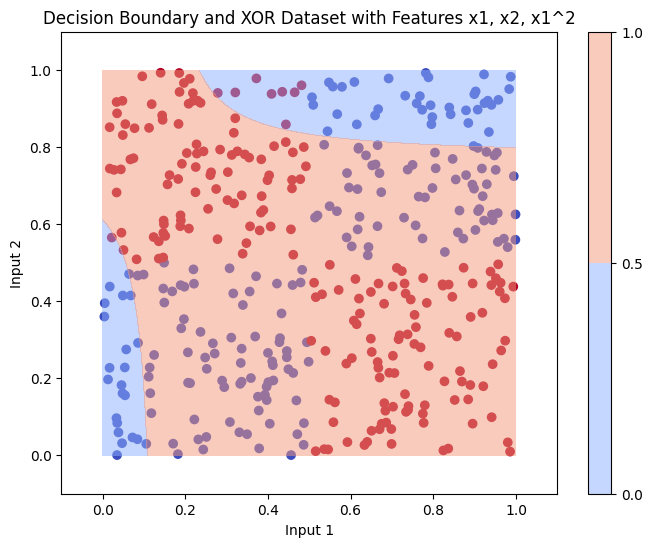

In [ ]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()]
    Z = model(torch.tensor(X_grid, dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0.0, 0.5, 1.0], cmap=plt.cm.coolwarm, alpha=0.5)
    plt.colorbar()
    plt.title('Decision Boundary and XOR Dataset with Features x1, x2, x1^2')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.show()

plot_decision_boundary(model, X_train_uniform, y_train_uniform)

As expected, the model performed badly in capturing the pattern of XOR data with high training as well as testing losses